In [198]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

In [199]:
read_csv=pd.read_csv('laptop_data.csv')
read_csv.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [200]:
read_csv['Price'] =read_csv['Price'] * 3.22

In [201]:
read_csv.shape

(1303, 12)

In [202]:
read_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [203]:
read_csv.duplicated().sum()
read_csv.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [204]:
read_csv.drop(columns=['Unnamed: 0'],inplace=True)

In [205]:
read_csv['Ram']=read_csv['Ram'].str.replace('GB','')


In [206]:

read_csv['Weight']=read_csv['Weight'].str.replace('kg','')


In [207]:
read_csv.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760


In [208]:
read_csv['Ram']=read_csv['Ram'].astype('int32')

In [209]:
read_csv['Weight']=read_csv['Weight'].astype('float32')

In [210]:
read_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


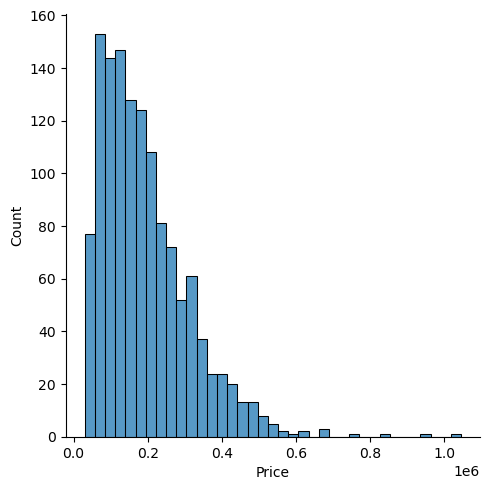

In [211]:
sb.displot(read_csv['Price'])


<Axes: ylabel='Price'>

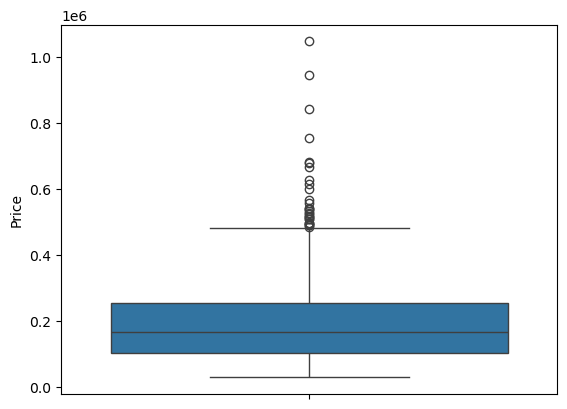

In [212]:
sb.boxplot(read_csv['Price'])

<Axes: xlabel='Company'>

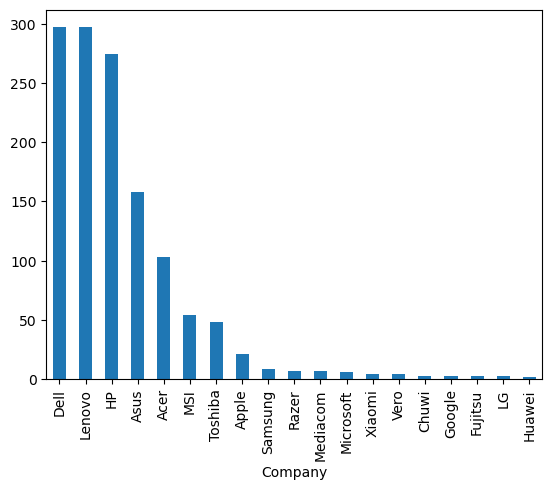

In [213]:
read_csv['Company'].value_counts().plot(kind='bar')

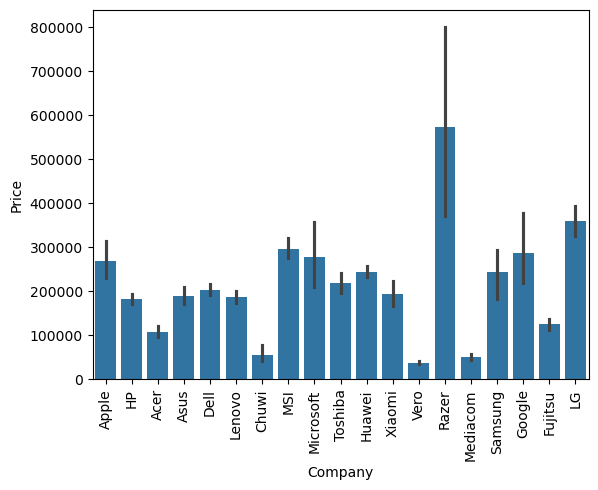

In [214]:
sb.barplot(x=read_csv['Company'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

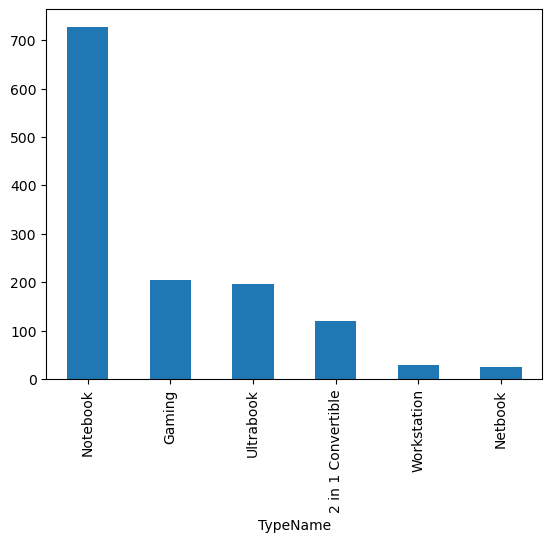

In [215]:
read_csv['TypeName'].value_counts().plot(kind='bar')

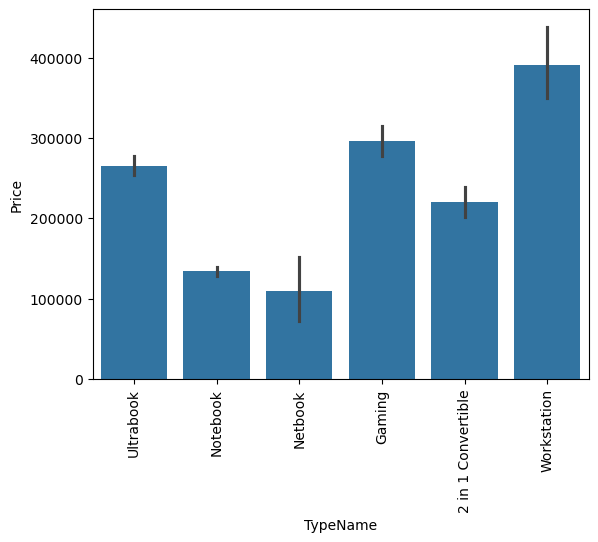

In [216]:
sb.barplot(x=read_csv['TypeName'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

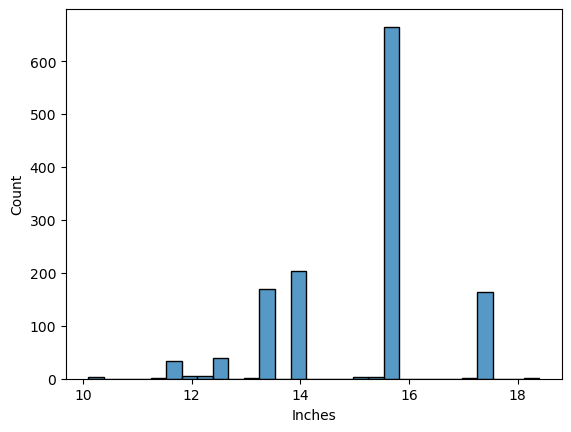

In [217]:
sb.histplot(read_csv['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

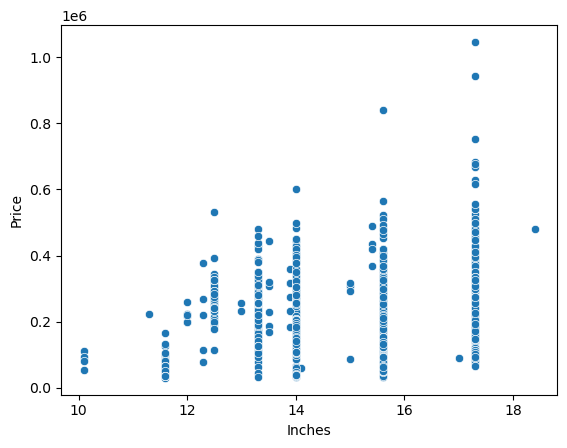

In [218]:
sb.scatterplot(x=read_csv['Inches'],y=read_csv['Price'])

In [219]:
read_csv['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [220]:
read_csv['Touchscreen']=read_csv['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [221]:
read_csv.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,68624.640000,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,367136.677152,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,198788.425920,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,256484.592000,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,132102.432000,0


<Axes: xlabel='Touchscreen'>

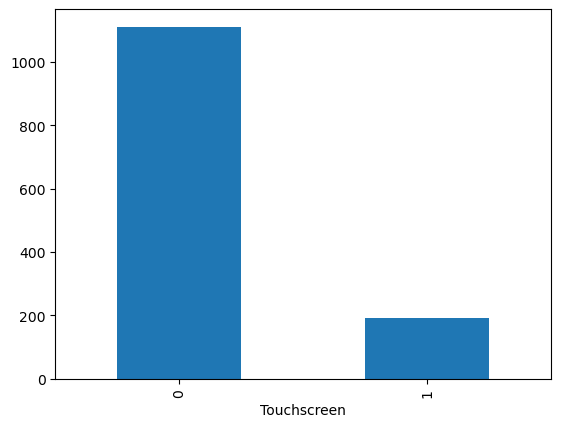

In [222]:
read_csv['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

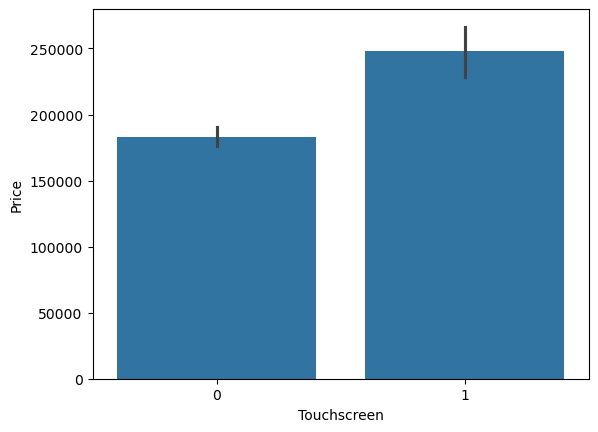

In [223]:
sb.barplot(x=read_csv['Touchscreen'],y=read_csv['Price'])

In [224]:
read_csv['Ips']=read_csv['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [225]:
read_csv.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1


<Axes: xlabel='Ips'>

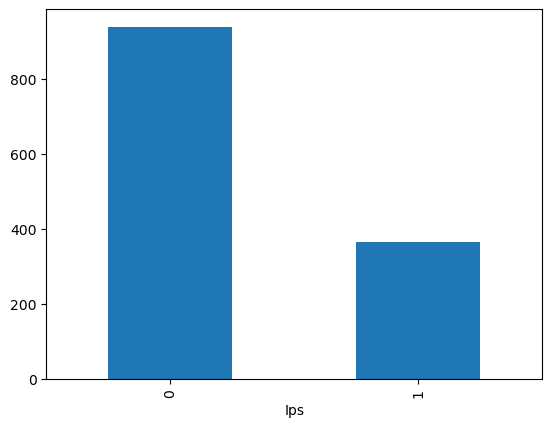

In [226]:
read_csv['Ips'].value_counts().plot(kind='bar')

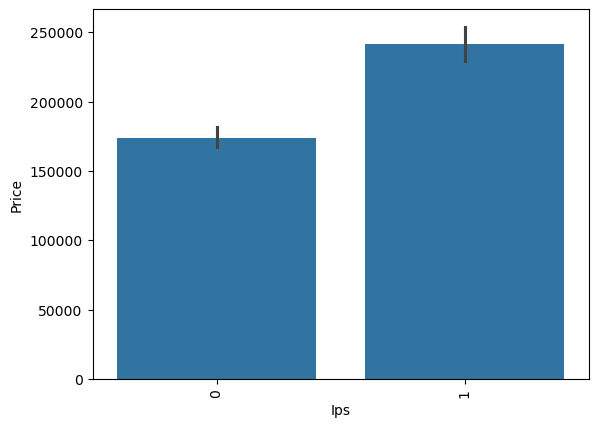

In [227]:
sb.barplot(x=read_csv['Ips'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [228]:
n=read_csv['ScreenResolution'].str.split('x',n=1,expand=True)


In [229]:
read_csv['X_res']=n[0]
read_csv['Y_res']=n[1]

In [230]:
read_csv.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,IPS Panel Retina Display 2560,1600


In [231]:
read_csv['X_res']=read_csv['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype('int32')

In [232]:
read_csv['Y_res']=read_csv['Y_res'].astype('int32')

In [233]:
read_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [234]:
read_csv.select_dtypes(include=[np.number]).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [235]:
read_csv['ppi']=((read_csv['X_res']**2) + (read_csv['Y_res']**2))**0.5/read_csv['Inches']

In [236]:
read_csv.select_dtypes(include=[np.number]).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [237]:
read_csv.drop(columns=['ScreenResolution'],inplace=True)
read_csv.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,2560,1600,226.983005


In [238]:
read_csv.drop(columns=['X_res','Y_res','Inches'],inplace=True)
read_csv.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005


In [239]:
read_csv['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [240]:
read_csv['Cpu Name']=read_csv['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [241]:
read_csv.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5


In [242]:
def cpu_name(txt):
    if txt=='Intel Core i7' or txt=='Intel Core i5' or txt=='Intel Core i3':
        return txt
    else:
        if txt.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return "AMD Processor"

In [243]:
read_csv['Cpu brand']=read_csv['Cpu Name'].apply(cpu_name)

In [244]:
read_csv.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

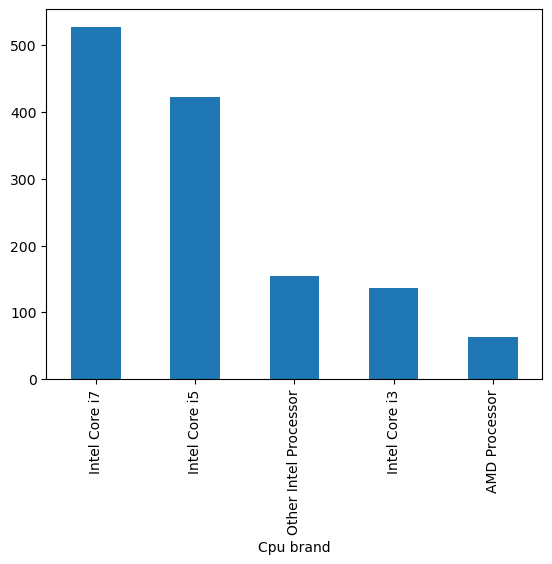

In [245]:
read_csv['Cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu brand', ylabel='Price'>

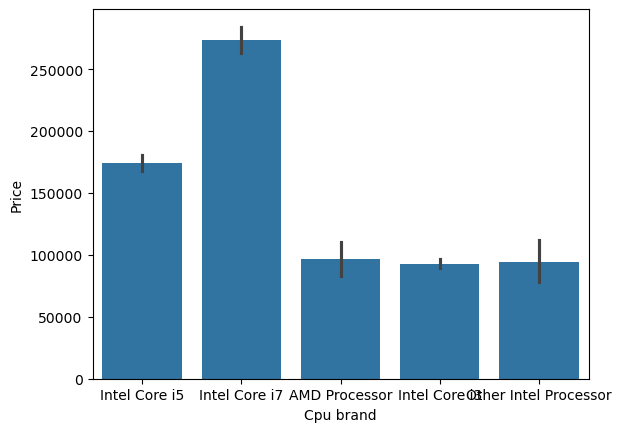

In [246]:
sb.barplot(x=read_csv['Cpu brand'],y=read_csv['Price'])

In [247]:
read_csv.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [248]:
read_csv.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

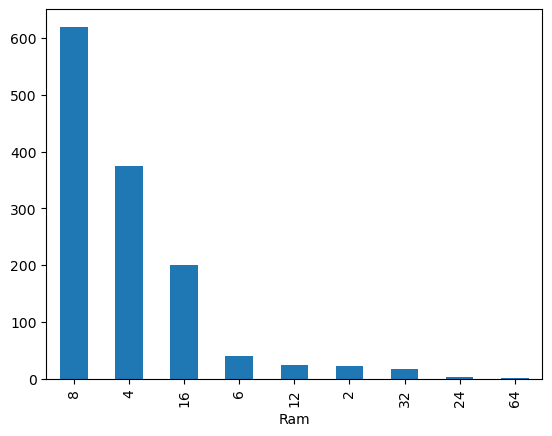

In [249]:
read_csv['Ram'].value_counts().plot(kind='bar')

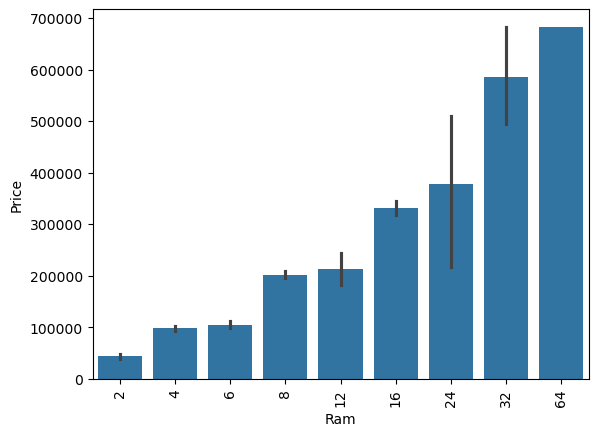

In [250]:
sb.barplot(x=read_csv['Ram'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [251]:
read_csv['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [252]:
# Clean the 'Memory' column
read_csv['Memory'] = read_csv['Memory'].astype(str).replace('\.0', '', regex=True)
read_csv['Memory'] = read_csv['Memory'].str.replace('GB', '')
read_csv['Memory'] = read_csv['Memory'].str.replace('TB', '000')  # 1TB = 1000GB

# Split into 'first' and 'second'
n = read_csv['Memory'].str.split('+', n=1, expand=True)
read_csv['first'] = n[0].str.strip()
read_csv['second'] = n[1].fillna('0')  # Ensure no NaN values

# Create storage type flags for 'first'
read_csv["Layer1HDD"] = read_csv['first'].apply(lambda x: 1 if 'HDD' in x else 0)
read_csv["Layer1SSD"] = read_csv['first'].apply(lambda x: 1 if 'SSD' in x else 0)
read_csv["Layer1Hybrid"] = read_csv['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
read_csv["Layer1Flash_Storage"] = read_csv['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Extract numeric value from 'first'
read_csv['first'] = read_csv['first'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# Create storage type flags for 'second'
read_csv['Layer2HDD'] = read_csv['second'].apply(lambda x: 1 if 'HDD' in x else 0)
read_csv['Layer2SSD'] = read_csv['second'].apply(lambda x: 1 if 'SSD' in x else 0)
read_csv['Layer2Hybrid'] = read_csv['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
read_csv['Layer2Flash_Storage'] = read_csv['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Clean and convert 'second' to numeric
read_csv['second'] = read_csv['second'].str.replace(r'\D+', '', regex=True)  # Remove all non-digits
read_csv['second'] = read_csv['second'].replace('', '0')  # Handle empty strings
read_csv['second'] = read_csv['second'].str.strip()  # Remove whitespace
read_csv['second'] = read_csv['second'].astype(int)

# Calculate final storage capacities
read_csv['HDD'] = read_csv['first'] * read_csv['Layer1HDD'] + read_csv['second'] * read_csv['Layer2HDD']
read_csv['SSD'] = read_csv['first'] * read_csv['Layer1SSD'] + read_csv['second'] * read_csv['Layer2SSD']
read_csv['Hybrid'] = read_csv['first'] * read_csv['Layer1Hybrid'] + read_csv['second'] * read_csv['Layer2Hybrid']
read_csv['Flash_Storage'] = read_csv['first'] * read_csv['Layer1Flash_Storage'] + read_csv['second'] * read_csv['Layer2Flash_Storage']

# Drop intermediate columns
read_csv.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 
                       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 
                       'Layer2Flash_Storage'], inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/vj/jkftb76576g6gntjkl2_4b0w0000gn/T/ipykernel_69737/236139296.py:2: SyntaxWarning: invalid escape sequence '\.'
  read_csv['Memory'] = read_csv['Memory'].astype(str).replace('\.0', '', regex=True)


In [253]:
read_csv.head(25)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,68624.640000,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,367136.677152,0,1,220.534624,Intel Core i7,0,0,0,256
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,198788.425920,0,0,127.677940,Intel Core i5,0,0,0,256
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,256484.592000,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,132102.432000,0,1,157.350512,Intel Core i5,0,256,0,0


In [254]:
read_csv.drop(columns=['Memory'],inplace=True)

In [255]:
read_csv.head(25)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,0,0
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,68624.640000,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,367136.677152,0,1,220.534624,Intel Core i7,0,0,0,256
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,198788.425920,0,0,127.677940,Intel Core i5,0,0,0,256
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,256484.592000,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,132102.432000,0,1,157.350512,Intel Core i5,0,256,0,0


In [256]:
read_csv.select_dtypes(include=[np.number]).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [257]:
read_csv.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [258]:
read_csv.head(25)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,68624.640000,0,0,100.454670,AMD Processor,500,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,367136.677152,0,1,220.534624,Intel Core i7,0,0
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,198788.425920,0,0,127.677940,Intel Core i5,0,0
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,256484.592000,0,0,157.350512,Intel Core i7,0,512
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,132102.432000,0,1,157.350512,Intel Core i5,0,256


In [259]:
read_csv['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [260]:
read_csv['Gpu brand']=read_csv['Gpu'].apply(lambda x:x.split()[0])

In [261]:
read_csv.head(25)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,Intel
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,68624.640000,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,367136.677152,0,1,220.534624,Intel Core i7,0,0,Intel
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,198788.425920,0,0,127.677940,Intel Core i5,0,0,Intel
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,256484.592000,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,132102.432000,0,1,157.350512,Intel Core i5,0,256,Intel


In [262]:
read_csv['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [263]:
read_csv=read_csv[read_csv['Gpu brand']!='ARM']

In [264]:
read_csv['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

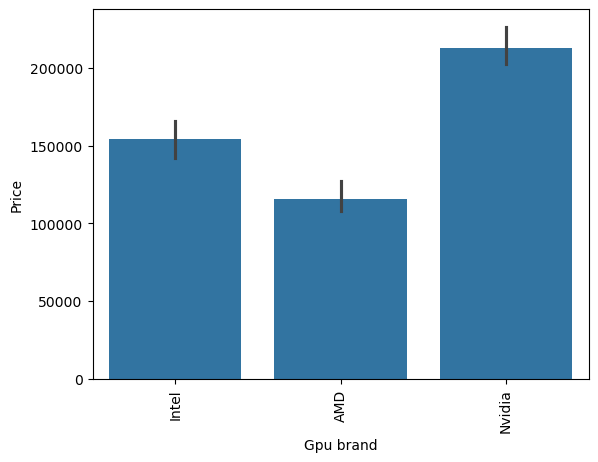

In [265]:
sb.barplot(x=read_csv['Gpu brand'],y=read_csv['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [266]:
read_csv.drop(columns=['Gpu'],inplace=True)

In [267]:
read_csv.head(25)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,Intel
5,Acer,Notebook,4,Windows 10,2.10,68624.640000,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac OS X,2.04,367136.677152,0,1,220.534624,Intel Core i7,0,0,Intel
7,Apple,Ultrabook,8,macOS,1.34,198788.425920,0,0,127.677940,Intel Core i5,0,0,Intel
8,Asus,Ultrabook,16,Windows 10,1.30,256484.592000,0,0,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows 10,1.60,132102.432000,0,1,157.350512,Intel Core i5,0,256,Intel


In [268]:
read_csv['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

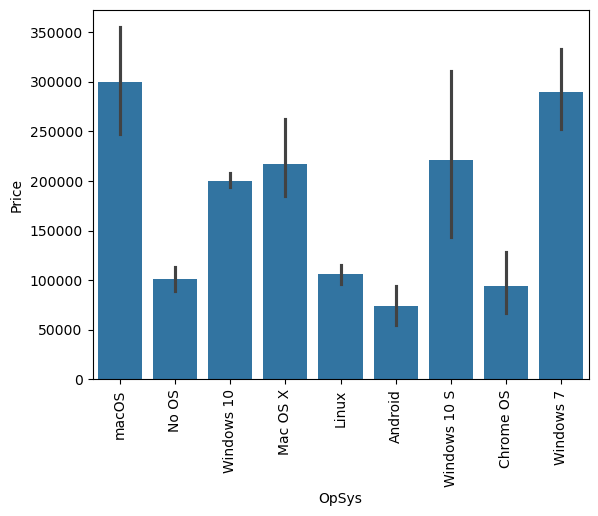

In [269]:
sb.barplot(x=read_csv['OpSys'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [270]:
def category_os(os):
    if os=='Windows 10' or os=='Windows 7' or os=='Windows 10 S':
        return 'Windows'
    elif os=='Mac OS X' or os=='macOS':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    

In [271]:
read_csv['os']=read_csv['OpSys'].apply(category_os)

In [272]:
read_csv.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [273]:
read_csv.drop(columns=['OpSys'],inplace=True)

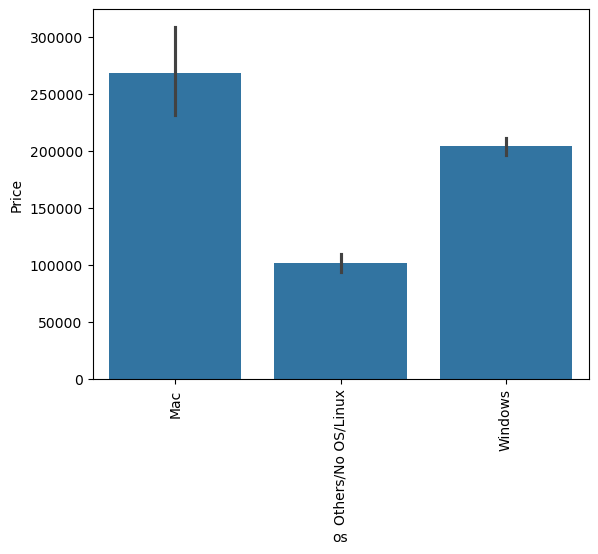

In [274]:
sb.barplot(x=read_csv['os'],y=read_csv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

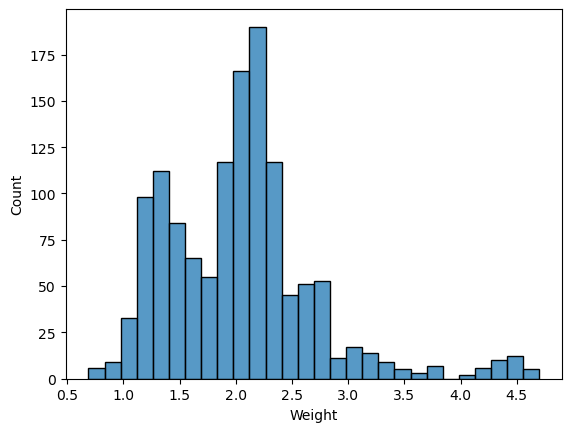

In [275]:
sb.histplot(read_csv['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

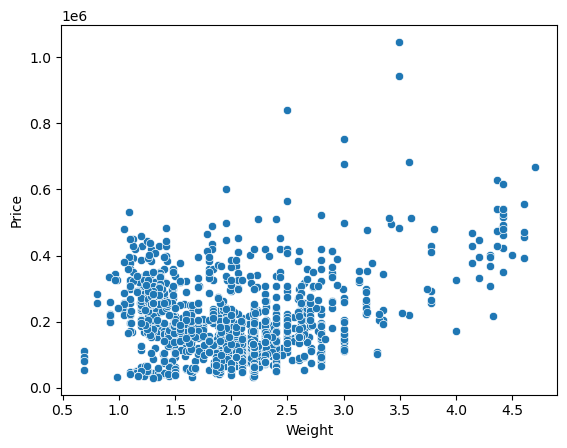

In [276]:
sb.scatterplot(x=read_csv['Weight'],y=read_csv['Price'])

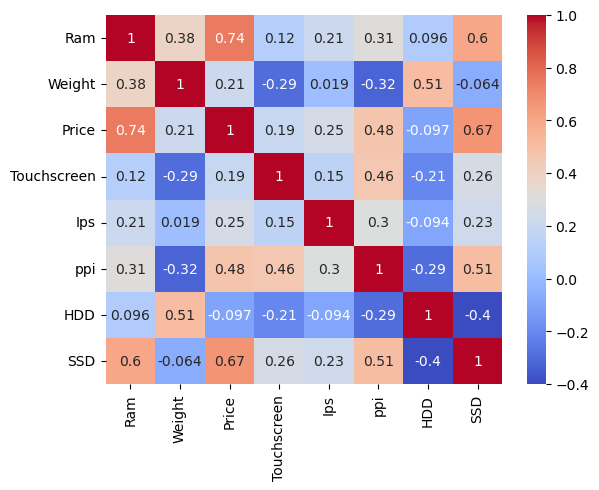

In [277]:
# Select only numeric columns
numeric_cols = read_csv.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [278]:
read_csv.select_dtypes(include=[np.number]).corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [279]:
read_csv.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,229839.359904,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,154223.584704,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,98647.920000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,435328.981920,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,309428.501760,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [280]:
read_csv.select_dtypes(include=[np.number]).corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

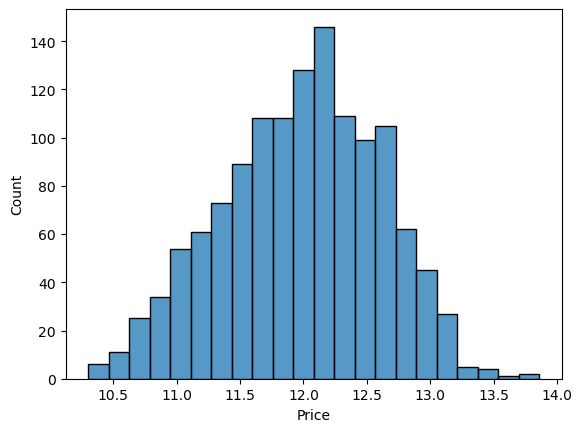

In [281]:
sb.histplot(np.log(read_csv['Price']))

In [282]:
X=read_csv.drop(columns=['Price'])
Y=np.log(read_csv['Price'])

In [283]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [284]:
Y

0       12.345136
1       11.946159
2       11.499312
3       12.983857
4       12.642482
          ...    
1298    11.603281
1299    12.457496
1300    10.578664
1301    11.783510
1302    11.055739
Name: Price, Length: 1302, dtype: float64

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [286]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [287]:
#Testing Linear Regression
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8073277448418643
Mean Absolute Error 0.21017827976428838


In [288]:
np.exp(0.2)

1.2214027581601699

In [289]:
#Testing Ridge Model
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8127331031311807
Mean Absolute Error 0.20926802242582973


In [290]:
#Testing Lasso Model
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8071853945317101
Mean Absolute Error 0.21114361613472593


In [291]:
#Testing KNeighbors Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.803148868705085
Mean Absolute Error 0.19264883332948862


In [292]:
#Testing Decision trees Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8411242894436338
Mean Absolute Error 0.18306807823671048


In [ ]:
#Testing SVR
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8082400752278732
Mean Absolute Error 0.20242824690361022


In [ ]:
#Testing the Random Forest Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.8,max_features=0.8,max_depth=17)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8899448728095243
Mean Absolute Error 0.15518111045242455


In [ ]:
#Testing the ExtraTrees Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.8,max_features=0.8,max_depth=17, bootstrap=True)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8859923366443064
Mean Absolute Error 0.15815981963777156


In [ ]:
#Testing Ada Boost Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.7901836363995463
Mean Absolute Error 0.23194772802009164


In [297]:
#Testing the Gradient Boost Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=475)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8808962614503838
Mean Absolute Error 0.16020589742747016


In [ ]:
#Testing the XGB Regressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.6)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.88929442128239
Mean Absolute Error 0.154822458407593


In [ ]:

#Checking if Voting Regressor improves the R2 Score
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

rndm_frst=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
grdn_bst=GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb_boost=XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
ext_tr_reg=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)


step2=VotingRegressor([('RandomForest',rndm_frst),
                       ('GradientBoosting',grdn_bst),
                       ('XGBoost',xgb_boost),
                       ('ExtraTrees',ext_tr_reg)],weights=[5,1,1,1])
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.883077998319633
Mean Absolute Error 0.16248884502553215


In [300]:
#Improving the hyperparas for RandomForest

# Assuming X_train, X_test, y_train, y_test are already defined


step1 = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)


step2 = RandomForestRegressor(random_state=3)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


param_grid = {
    'step2__n_estimators': [200, 300],
    'step2__max_depth': [15, 20, 25],
    'step2__max_features': [0.7, 0.8, 0.9],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4],
    'step2__max_samples': [0.7, 0.8, 0.9]
}


grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)


print("Starting grid search...")
grid_search.fit(X_train, y_train)
print("Grid search complete!")


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


print("\nBest Parameters:", grid_search.best_params_)
print("Test R2 Score:", round(r2_score(y_test, y_pred), 4))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 4))

# Cross-validated score
cv_score = np.mean(grid_search.cv_results_['mean_test_score'])
print("Cross-validated R2 Score:", round(cv_score, 4))


Starting grid search...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Grid search complete!

Best Parameters: {'step2__max_depth': 25, 'step2__max_features': 0.7, 'step2__max_samples': 0.9, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 2, 'step2__n_estimators': 300}
Test R2 Score: 0.8904
Test MAE: 0.1545
Cross-validated R2 Score: 0.8651


In [301]:
#Testing the Random Forest Regressor with Improved params
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=300,random_state=3,max_samples=0.9,max_features=0.7,max_depth=25,min_samples_leaf=1,min_samples_split=2)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.89043715680706
Mean Absolute Error 0.154488037375459
